In [24]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(42)
tf.random.set_seed(42)#가져올 데이터가 고정

data = fetch_california_housing()
in_data = StandardScaler().fit_transform(data.data)
x_data, tt_x, y_data, tt_y =train_test_split(in_data,data.target ,random_state=42)
#x_data, tt_x, y_data, tt_y =train_test_split(data.data,data.target ,random_state=42)
t_x, v_x,t_y,v_y = train_test_split(x_data,y_data, random_state= 42, test_size= 0.2)
'''
s = StandardScaler()
#데이터 3개 검증
t_x = s.fit_transform(t_x)
tt_x = s.fit_transform(tt_x)
v_x = s.fit_transform(v_x)'''

t_x.shape[1:]# 입력 data의 차원의 형상

(8,)

In [9]:
m = keras.models.Sequential()
m.add(keras.layers.Flatten(input_shape=t_x.shape[1:]))
m.add(keras.layers.Dense(30,activation='relu'))
m.add(keras.layers.Dense(1))
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 30)                270       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


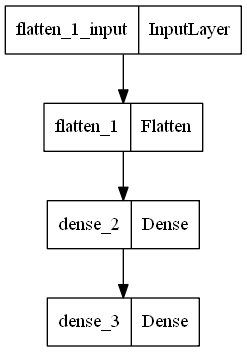

In [14]:
keras.utils.plot_model(m,'m.png')

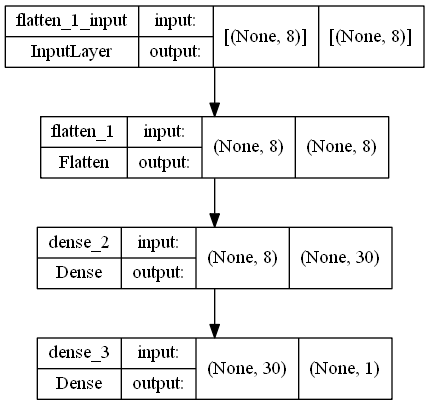

In [15]:
keras.utils.plot_model(m,"m.png",show_shapes=True)


In [21]:
m.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),loss='mean_squared_error',metrics='accuracy')
hy=m.fit(t_x,t_y,validation_data=(v_x,v_y),epochs = 20)
t_hy = m.evaluate(tt_x,tt_y)

Epoch 1/20
387/387 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.0033 - val_loss: 0.4424 - val_accuracy: 0.0032
Epoch 2/20
387/387 [==============================] - 0s 827us/step - loss: 0.4660 - accuracy: 0.0033 - val_loss: 0.4394 - val_accuracy: 0.0032
Epoch 3/20
387/387 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.0033 - val_loss: 0.4375 - val_accuracy: 0.0032
Epoch 4/20
387/387 [==============================] - 0s 992us/step - loss: 0.4607 - accuracy: 0.0033 - val_loss: 0.4357 - val_accuracy: 0.0032
Epoch 5/20
387/387 [==============================] - 0s 941us/step - loss: 0.4584 - accuracy: 0.0033 - val_loss: 0.4329 - val_accuracy: 0.0032
Epoch 6/20
387/387 [==============================] - 0s 850us/step - loss: 0.4568 - accuracy: 0.0033 - val_loss: 0.4314 - val_accuracy: 0.0032
Epoch 7/20
387/387 [==============================] - 0s 899us/step - loss: 0.4543 - accuracy: 0.0033 - val_loss: 0.4301 - val_accuracy: 0.0

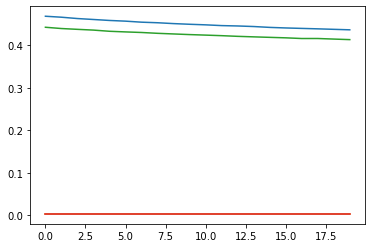

In [22]:
plt.plot(pd.DataFrame(hy.history))

In [20]:
tt_y[:3]

array([0.477  , 0.458  , 5.00001])

In [19]:
m.predict(tt_x[:3])

array([[0.68847674],
       [1.4980192 ],
       [2.9209414 ]], dtype=float32)